In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [2]:
df = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/mobile_datas/01_total.csv')

In [4]:
df_month07 = df[df['date']<20220732]

In [5]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [6]:
estimate_from_mobile_data = []
for day in day_list:
    estimate_perday = []
    key_day = int('202207' + day)
    df_oneday = df_month07[df_month07['date']==key_day]
    for hour in range(0,24):
        key_hour = hour*100
        df_onehour =df_oneday[df_oneday['time']==key_hour]
        estimate_perday.append(df_onehour['population'].sum())
    estimate_from_mobile_data.append(estimate_perday)

In [9]:
estimate_from_mobile_data = np.array(estimate_from_mobile_data)

In [12]:
estimate_from_mobile_data.max()

2547299

In [ ]:
np.save('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_from_mobile_data', estimate_from_mobile_data)

Text(69.0, 0.5, 'hour')

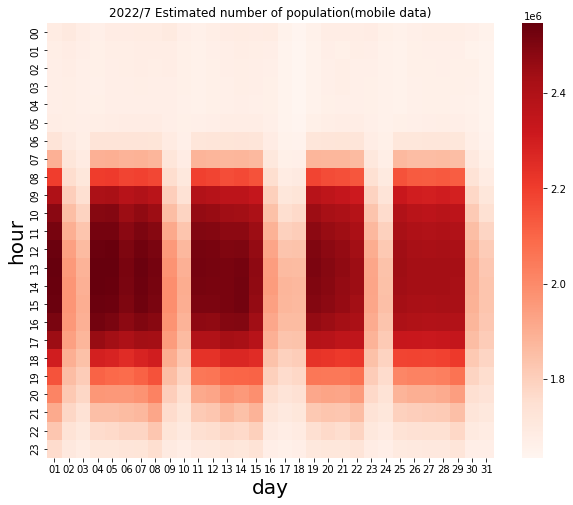

In [13]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_from_mobile_data.T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of population(mobile data)')
heatmap.set_xlabel('day',fontsize=20)
heatmap.set_ylabel('hour',fontsize=20)